In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', (FutureWarning, ConvergenceWarning))
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from seaborn import heatmap

In [2]:
# Load the dataset and explore the data

In [3]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education_Num", "Martial_Status", "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_week", "Country", "Income"]
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
df_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?")
df_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?", skiprows=1)
df_train.drop(["fnlwgt", "Education"], axis = 1, inplace = True)
df_test.drop(["fnlwgt", "Education"], axis = 1, inplace = True)
X_train, y_train = df_train.drop('Income', axis = 1), df_train['Income']
X_test, y_test = df_test.drop('Income', axis = 1), df_test['Income'].replace('<=50K.', '<=50K').replace('>50K.', '<=50K')

In [4]:
df_train.head()

,Age,Workclass,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train.shape

(32561, 13)

In [6]:
#1. Determine which features are continuous vs categorical.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Education_Num   32561 non-null  int64 
 3   Martial_Status  32561 non-null  object
 4   Occupation      30718 non-null  object
 5   Relationship    32561 non-null  object
 6   Race            32561 non-null  object
 7   Sex             32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_per_week  32561 non-null  int64 
 11  Country         31978 non-null  object
 12  Income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       15318 non-null  object
 2   Education_Num   16281 non-null  int64 
 3   Martial_Status  16281 non-null  object
 4   Occupation      15315 non-null  object
 5   Relationship    16281 non-null  object
 6   Race            16281 non-null  object
 7   Sex             16281 non-null  object
 8   Capital_Gain    16281 non-null  int64 
 9   Capital_Loss    16281 non-null  int64 
 10  Hours_per_week  16281 non-null  int64 
 11  Country         16007 non-null  object
 12  Income          16281 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.6+ MB


In [9]:
y_train.head

<bound method NDFrame.head of 0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: Income, Length: 32561, dtype: object>

In [10]:
#2. Use proper preprocessing and pipeline.Evaluate the Decision Tree model using cross-validation with the default parameters.

In [11]:
categorical = X_train.dtypes == object
dt = DecisionTreeClassifier()
preprocess = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical)) 
pipe = make_pipeline(preprocess, dt)
np.mean(cross_val_score(pipe, X_train, y_train))

0.8204906761792989

In [12]:
#3. Tune the parameters of the models using GridSearchCV for max_depth with values range(2, 20, 2). 
# What is the best parameter and best validation score from the grid search?

In [13]:
param_grid = {'decisiontreeclassifier__max_depth': range(2, 20, 2)}
grid1 = GridSearchCV(pipe, param_grid) 
grid1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Age               False
Workclass          True
Education_Num     False
Martial_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      False
Hours_per_week    False
Country            True
dtype: bool)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': range(2, 20, 2)})

In [14]:
grid1.best_params_

{'decisiontreeclassifier__max_depth': 10}

In [15]:
grid1.best_score_

0.8578362034200356

In [16]:
#4. Visualize the dependence of the validation score on the parameter max_depth.

In [17]:
results = pd.DataFrame(grid1.cv_results_)
results.head

<bound method NDFrame.head of    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.122797      0.016814         0.036090        0.003992   
1       0.135632      0.015791         0.025774        0.003561   
2       0.201946      0.018910         0.033799        0.006134   
3       0.295618      0.028081         0.031282        0.004004   
4       0.446369      0.030179         0.038373        0.009638   
5       0.597871      0.029774         0.036909        0.006541   
6       0.854909      0.100350         0.037960        0.003009   
7       1.090831      0.039164         0.036705        0.006933   
8       1.135677      0.123676         0.036727        0.004977   

  param_decisiontreeclassifier__max_depth  \
0                                       2   
1                                       4   
2                                       6   
3                                       8   
4                                      10   
5                            

<Axes: xlabel='param_decisiontreeclassifier__max_depth'>

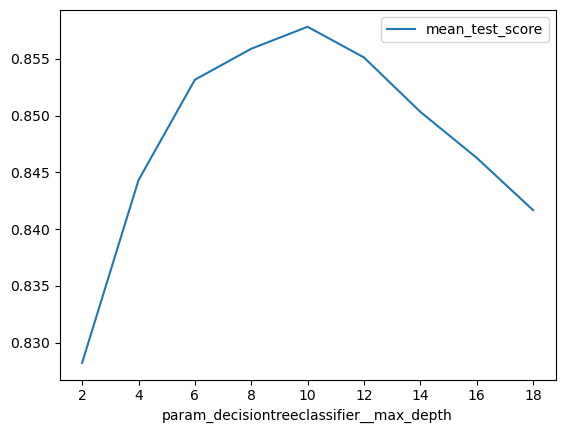

In [18]:
results.plot('param_decisiontreeclassifier__max_depth', 'mean_test_score')

In [19]:
#5. Tune the parameters of the models using GridSearchCV for ccp_alpha with values np.linspace(0., 0.03, 10). 
# What is the best parameter and best validation score from the grid search?

In [20]:
param_grid = {'decisiontreeclassifier__ccp_alpha': np.linspace(0., 0.03, 10) }
grid2 = GridSearchCV(pipe, param_grid) 
grid2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unkno...
Education_Num     False
Martial_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      False
Hours_per_week    False
Country            True
dtype: bool)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__ccp_alpha': array([0.        , 0.00333333, 0.00666667, 0.01      , 0.01333333,
       0.01666667, 0.02      , 0.02333333, 0.02666667, 0.03      ])})

In [21]:
grid2.best_params_

{'decisiontreeclassifier__ccp_alpha': 0.003333333333333333}

In [22]:
grid2.best_score_

0.8446609898705708

In [23]:
#6. Visualize the dependence of the validation score on the parameter ccp_alpha.

In [24]:
results = pd.DataFrame(grid2.cv_results_)
results.head

<bound method NDFrame.head of    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.759995      0.040947         0.037575        0.003496   
1       1.701926      0.048897         0.035841        0.004800   
2       1.671677      0.037333         0.031235        0.004653   
3       1.676102      0.042672         0.034987        0.002649   
4       1.679054      0.027125         0.034422        0.003351   
5       1.660909      0.080986         0.032152        0.003530   
6       1.691598      0.047776         0.033059        0.005045   
7       1.657789      0.027629         0.034270        0.003799   
8       1.597730      0.073155         0.033268        0.005830   
9       1.495846      0.051688         0.025948        0.005460   

  param_decisiontreeclassifier__ccp_alpha  \
0                                     0.0   
1                                0.003333   
2                                0.006667   
3                                    0.01   
4      

<Axes: xlabel='param_decisiontreeclassifier__ccp_alpha'>

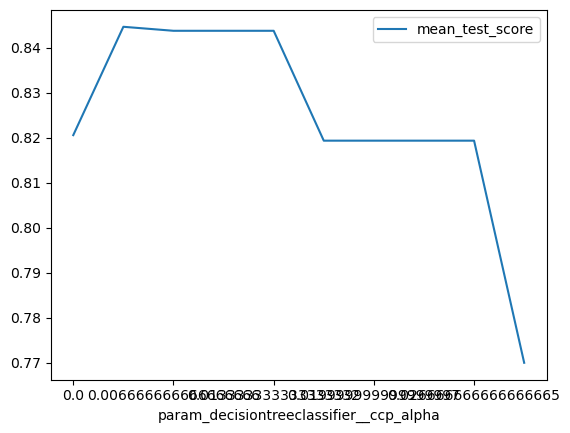

In [25]:
results.plot('param_decisiontreeclassifier__ccp_alpha', 'mean_test_score')

In [26]:
#7. Compare the best cross validation scores of the two grid searches. Which model is better? Ans: The first one is better.
# What is the performance of the best tree model on the testing set? Ans: It is 0.815.

In [27]:
grid1.score(X_test, y_test)

0.8151833425465266

In [28]:
grid2.score(X_test, y_test)

0.8316442478963209

In [29]:
#8. Plot the best model’s tree structure.

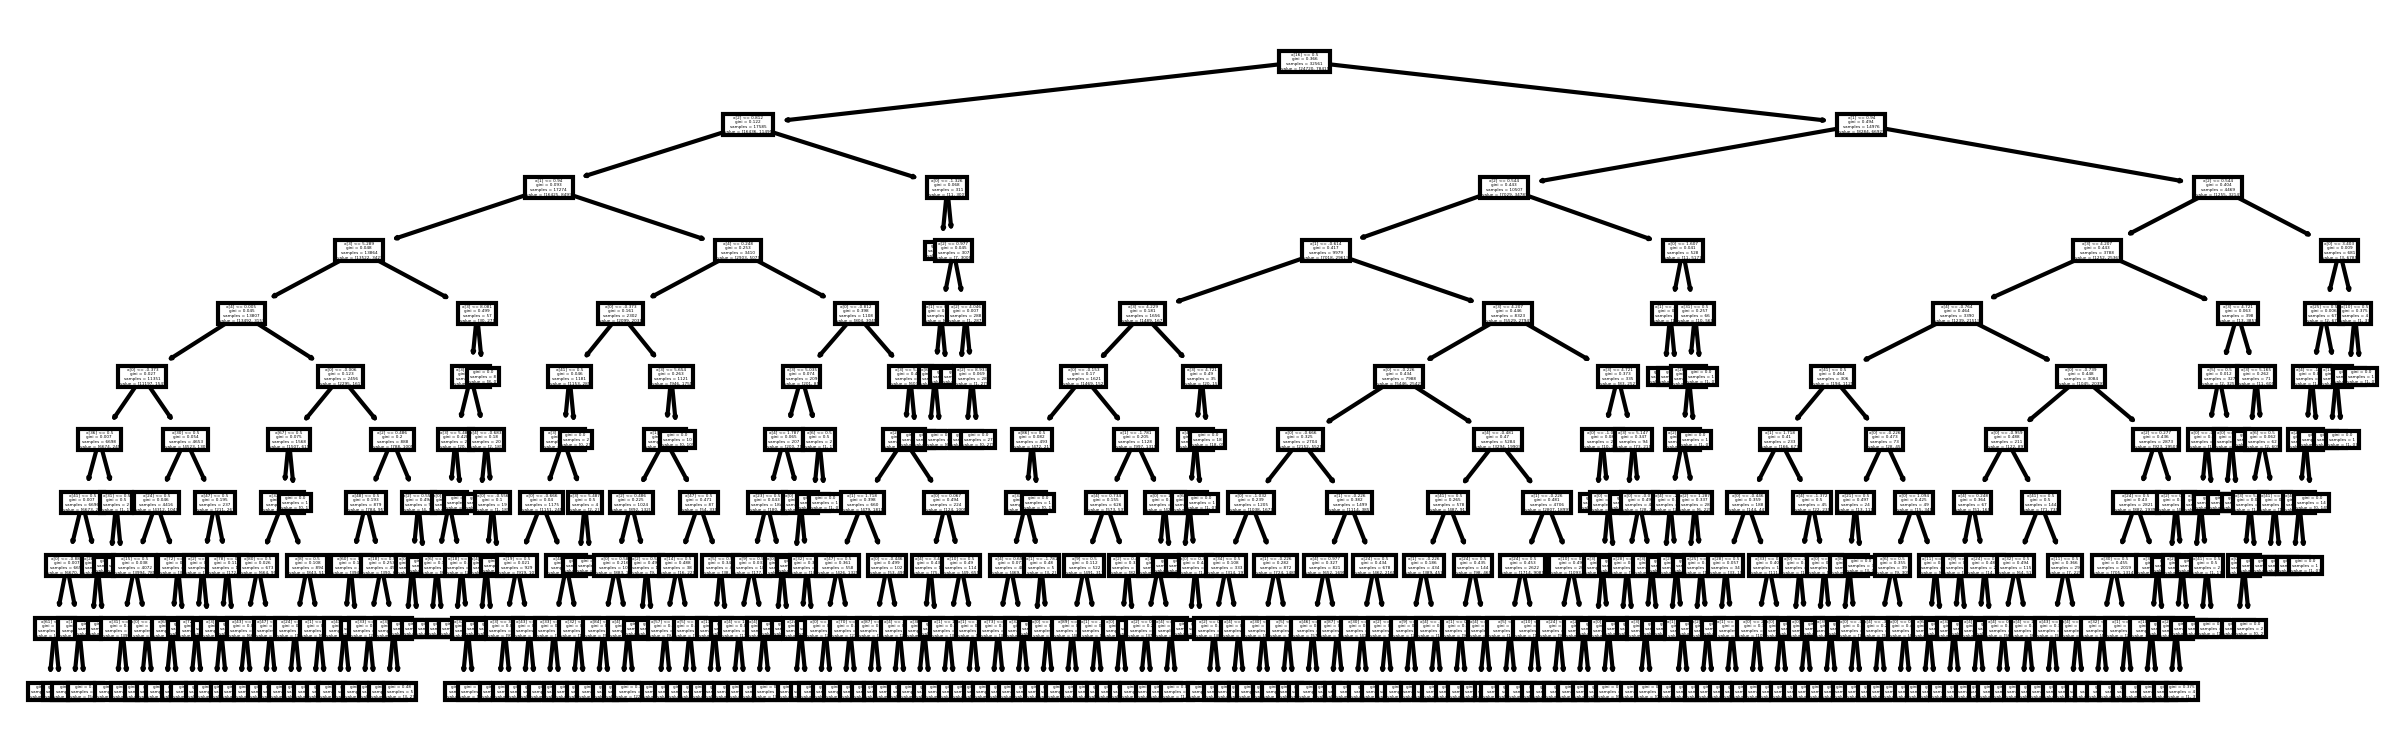

In [30]:
tree = grid1.best_estimator_.named_steps.decisiontreeclassifier
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree)

In [31]:
#9. Using the training set to train a Gradient Boosting model with the default parameters.
# What is the model’s performance on the testing set? Ans: 0.819.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gbc = GradientBoostingClassifier()
preprocess = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical)) 
pipe = make_pipeline(preprocess, gbc)

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Age                True
Workclass         False
Education_Num      True
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain       True
Capital_Loss       True
Hours_per_week     True
Country           False
dtype: bool),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Age               False
Workclass          True
Education_Num     False
Martial_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      False
Hours_per_week    False
Country            True
dtype: bool)])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [35]:
pipe.score(X_test, y_test)

0.8190528837295007

In [36]:
#10. (Extra credits) Compare the top 10 important features of decision tree and gradient boosting. How much do they agree?

In [37]:
f_imp = grid1.best_estimator_.named_steps.decisiontreeclassifier.feature_importances_

In [38]:
f_imp

array([5.02956233e-02, 2.11431327e-01, 1.93115686e-01, 6.74834084e-02,
       3.59087169e-02, 2.97020090e-03, 1.47755997e-03, 0.00000000e+00,
       2.12201694e-04, 9.07808224e-04, 6.58300256e-03, 1.02868371e-03,
       0.00000000e+00, 0.00000000e+00, 6.81832595e-04, 2.37090456e-04,
       3.84382281e-01, 0.00000000e+00, 7.43048840e-04, 5.87806637e-05,
       0.00000000e+00, 2.35174654e-04, 0.00000000e+00, 6.95636992e-05,
       1.18201164e-02, 9.60986994e-04, 0.00000000e+00, 0.00000000e+00,
       9.44012395e-04, 0.00000000e+00, 6.96097600e-03, 8.25252182e-04,
       2.06525972e-03, 1.28782567e-03, 4.40437512e-04, 3.26523486e-04,
       1.60978224e-04, 7.17261832e-04, 1.93673244e-04, 0.00000000e+00,
       0.00000000e+00, 5.67523310e-03, 2.70102148e-04, 5.62792718e-04,
       0.00000000e+00, 0.00000000e+00, 5.01177101e-04, 2.74379053e-03,
       7.00614231e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

[41 10 30 24  4  0  3  2  1 16]


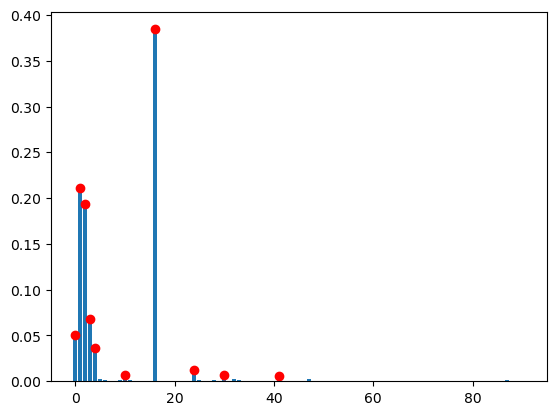

In [39]:
dt_top10 = np.argsort(abs(f_imp))[-10:]
plt.bar([x for x in range(len(f_imp))], f_imp)
plt.scatter(dt_top10, f_imp[dt_top10], color = 'r')
print(dt_top10)

In [40]:
gb_imp = pipe.steps[1][1].feature_importances_

In [41]:
gb_imp

array([6.11771104e-02, 2.00135095e-01, 2.00129920e-01, 5.92566255e-02,
       3.64533335e-02, 1.45191342e-03, 8.61793465e-04, 0.00000000e+00,
       1.44069997e-04, 7.11364826e-04, 3.31375534e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.37935646e-04,
       3.83156032e-01, 4.59035996e-05, 3.60509655e-04, 1.45436869e-04,
       0.00000000e+00, 6.20536318e-04, 0.00000000e+00, 3.06450519e-05,
       1.79509708e-02, 4.49522588e-03, 5.03394366e-04, 2.07599311e-04,
       4.29931513e-03, 0.00000000e+00, 8.97063665e-03, 9.88099367e-04,
       1.07081112e-03, 2.02705866e-03, 4.92335529e-05, 0.00000000e+00,
       5.03181299e-04, 0.00000000e+00, 0.00000000e+00, 7.80069527e-04,
       8.16083630e-05, 4.92806198e-03, 7.93496535e-05, 0.00000000e+00,
       7.82523214e-05, 0.00000000e+00, 3.14932061e-04, 1.49738121e-03,
       9.15691048e-04, 1.30285027e-04, 6.48195621e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

[25 41 30 24  4  3  0  2  1 16]


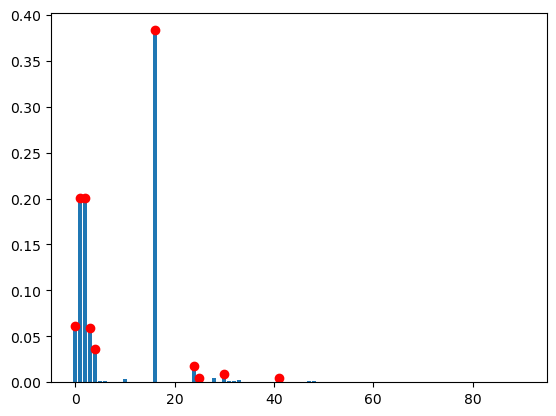

In [42]:
gb_top10 = np.argsort(abs(gb_imp))[-10:]
plt.bar([x for x in range(len(gb_imp))], gb_imp)
plt.scatter(gb_top10, gb_imp[gb_top10], color = 'r')
print(gb_top10)

In [43]:
# From the figures and the idx, we can see they match a lot.

In [44]:
# All the questions (including the extra credit questions) are answered. Thank you.